In [3]:
import sys
sys.path.append('/home/pranavsatheesh/host_galaxies/')

In [28]:
import illustris_python as il
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [29]:
SOLAR_MASS_G = 1.989e33
MSOL = 1.988409870698051e+33

In [30]:
basePath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'
codePath = '/home/pranavsatheesh/host_galaxies/merger_file_runs'

In [31]:
# Load scale factors and redshifts
snap_list = np.arange(1,100)
redshifts = np.array([il.groupcat.loadHeader(basePath, snap)['Redshift'].item() for snap in snap_list])
scale_factors = np.array([il.groupcat.loadHeader(basePath, snap)['Time'].item() for snap in snap_list])

## Number of galaxy mergers with Nbh = 1 atleast

In [32]:
merger_file_1bh = codePath+'/galaxy-mergers_TNG50-1_gas-100_dm-100_star-100_bh-001.hdf5'#merger file
merger_file_nobh = codePath+'/galaxy-mergers_TNG50-1_gas-100_dm-100_star-100_bh-000.hdf5'


In [33]:
fmergers = h5py.File(merger_file_1bh, 'r')

In [41]:
hubble_param = fmergers.attrs['HubbleParam']
print(hubble_param)

0.6774


In [14]:
subhaloidxs_galaxy_mergers = fmergers["shids_subf"][:,2]
#using the descendent progenitor pointer
snaps_galaxy_mergers = fmergers['snaps'][:,2]

In [15]:
#redshifts of host galaxies of MBHBs will be indicated by the dominant progenitor
z_galaxy_mergers = 1/(fmergers['time'][:][:,2])-1

Text(0, 0.5, 'Number of galaxy mergers with Nbh = 1')

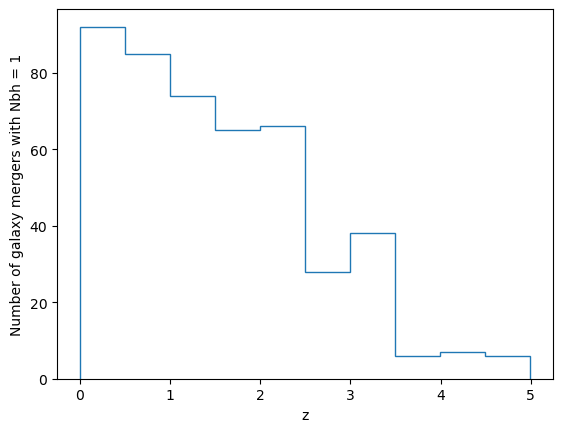

In [9]:
#plt.hist(1/(fmergers['time'][:][:,0])-1,bins=10,histtype = "step")
#plt.hist(1/(fmergers['time'][:][:,2])-1,bins=10,histtype = "step")

plt.hist(z_galaxy_mergers,bins=10,histtype="step")
plt.xlabel("z")
plt.ylabel("Number of galaxy mergers with Nbh = 1")

Text(0, 0.5, 'Number of galaxy mergers with Nbh = 1')

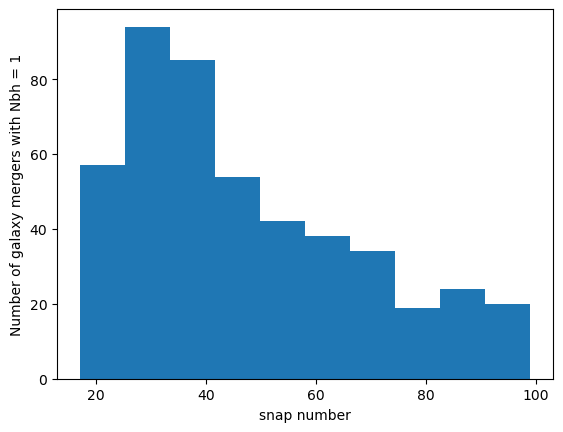

In [10]:
plt.hist(fmergers['snaps'][:,2])
plt.xlabel("snap number")
plt.ylabel("Number of galaxy mergers with Nbh = 1")

## checking subfindID and subhalo index within a snapshot

In [11]:
fmergers['snaps'][0]

array([35, 35, 36])

In [12]:
fmergers['shids_subf'][:][0]

array([79670, 79673, 89639])

In [13]:
SOLAR_MASS_G = 1.989e33
MSOL = 1.988409870698051e+33

In [14]:
fmergers['SubhaloBHMass'][0]/MSOL

array([1.20588772e+08, 6.44340968e+07, 2.16667193e+08])

In [ ]:
snapNum = 35
subhalos = il.groupcat.loadSubhalos(basePath, snapNum, fields=['SubhaloBHMass','SubhaloMassType','SubhaloLenType'])

In [137]:
subhalos['SubhaloBHMass'][79673]* 1e10 / 0.6774

64434096.764895216

In [146]:
fmergers['snaps'][2]

array([21, 20, 22])

In [152]:
np.where(z_galaxy_mergers>4)

(array([  5,   9,  31,  33, 135, 136, 138, 169, 193, 228, 229, 230, 335]),)

In [42]:
snapNum = 36
sub_lentype = il.groupcat.loadSubhalos(basePath, snapNum, fields=['SubhaloLenType'])


Ngas = sub_lentype[:,0]
Ndm = sub_lentype[:,1]
Nstar = sub_lentype[:,4]
Nbh = sub_lentype[:,5]

minNdm=100
minNgas=100
minNstar=100
minNbh=1

## Binning the redshifts and snap numbers

In [11]:
dz = 1
min_z = 0
max_z = 6

z_bins = np.arange(min_z, max_z + dz, dz)
print(z_bins)

[0 1 2 3 4 5 6]


In [12]:
# merging galaxy sampled by redshifts 
z_bin_indices_mergers = np.digitize(z_galaxy_mergers,z_bins, right=False)
#Group them by redshift, snap number and subhalo IDs. Use the subhaloIDs to cross reference with the subfind subhalo catalogue

In [39]:
max(z_galaxy_mergers)

np.float64(4.995933485958621)

In [36]:
np.min(snaps_galaxy_mergers)

np.int64(17)

In [13]:
# 0<z<1
# z_bin_indices_mergers = 1
print(f"This bin corresponds to redshifts 0=<z<1")
print(f"The redshifts of the first 3 mergers in this bin is {z_galaxy_mergers[z_bin_indices_mergers==1][:3]}")
print(f"The redshifts of the first 3 mergers in this bin is {snaps_galaxy_mergers[z_bin_indices_mergers==1][:3]}")
print(f"The redshifts of the first 3 mergers in this bin is {subhaloidxs_galaxy_mergers[z_bin_indices_mergers==1][:3]}")

This bin corresponds to redshifts 0=<z<1
The redshifts of the first 3 mergers in this bin is [0.64464184 0.73263618 0.54639218]
The redshifts of the first 3 mergers in this bin is [61 58 65]
The redshifts of the first 3 mergers in this bin is [341236  47221  93009]


In [14]:
#get all the unique snapshot numbers within this redshift bin that corresponds to a galaxy merger
snaps_where_merger = np.unique(snaps_galaxy_mergers[z_bin_indices_mergers==1])
print(snaps_where_merger)

[50 51 52 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90 91 92 93 94 95 96 97 98 99]


In [15]:
z_bin_indices_all = np.digitize(redshifts,z_bins,right=False)

### Creating a non-merging sample in the redshift bin

*for each snapshots, load the subhalo informations and check for the snap numbers and subhalo IDs in the merger population and exclude them from the non-merging sample*

In [16]:
snap_list[z_bin_indices_all==1]

array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [19]:
def load_subhalo_info(basePath, snapNum,minN_values,snaps_galaxy_mergers, subhaloidxs_galaxy_mergers):
    subhalos = il.groupcat.loadSubhalos(basePath, snapNum, fields=['SubhaloLenType','SubhaloMassType','SubhaloBHMass','SubhaloBHMdot','SubhaloSFR'])
    Ngas = subhalos['SubhaloLenType'][:,0]
    Ndm = subhalos['SubhaloLenType'][:,1]
    Nstar = subhalos['SubhaloLenType'][:,4]
    Nbh = subhalos['SubhaloLenType'][:,5]
    subhalo_ids = np.arange(len(Ngas))
    #subhalo_ids = subhalo_ids[(Ngas>=minN_values[0]) & (Ndm>=minNdm) & (Nstar>=minNstar) & (Nbh>=minNbh)] #applying the minimum number of particles cut
    subhalo_ids = subhalo_ids[(Ngas >= minN_values[1]) & (Ndm >= minN_values[0]) & (Nstar >= minN_values[2]) & (Nbh >= minN_values[3])] # applying the minimum number of particles cut
    #subhaloidxs_galaxy_mergers[np.where(snaps_galaxy_mergers==snapNum)]

    subhalo_ids_merging = subhaloidxs_galaxy_mergers[np.where(snaps_galaxy_mergers==snapNum)]

    if subhalo_ids_merging.size == 0:
        print(f"No galaxy mergers at snapNum {snapNum}")
        return None

    else:    
        subhalo_ids_non_merging = np.setdiff1d(subhalo_ids,subhalo_ids_merging)

        Mstar_merging = subhalos['SubhaloMassType'][subhalo_ids_merging,4]
        Mgas_merging = subhalos['SubhaloMassType'][subhalo_ids_merging,0]
        MBH_merging = subhalos['SubhaloBHMass'][subhalo_ids_merging]
        Mdot_merging = subhalos['SubhaloBHMdot'][subhalo_ids_merging]
        SFR_merging = subhalos['SubhaloSFR'][subhalo_ids_merging]

        Mstar_non_merging = subhalos['SubhaloMassType'][subhalo_ids_non_merging,4]
        Mgas_non_merging = subhalos['SubhaloMassType'][subhalo_ids_non_merging,0]
        MBH_non_merging = subhalos['SubhaloBHMass'][subhalo_ids_non_merging]    
        Mdot_non_merging = subhalos['SubhaloBHMdot'][subhalo_ids_non_merging]
        SFR_non_merging = subhalos['SubhaloSFR'][subhalo_ids_non_merging]

    merging_population = {
        "subhalo_ids": subhalo_ids_merging,
        "Mstar": Mstar_merging,
        "Mgas": Mgas_merging,
        "MBH": MBH_merging,
        "Mdot": Mdot_merging,
        "SFR": SFR_merging
    }

    non_merging_population = {
        "subhalo_ids": subhalo_ids_non_merging,
        "Mstar": Mstar_non_merging,
        "Mgas": Mgas_non_merging,
        "MBH": MBH_non_merging,
        "Mdot": Mdot_non_merging,
        "SFR": SFR_non_merging
    }

    return merging_population, non_merging_population

In [21]:
z_bin_indices_all

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 4,
       4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
def generate_population(basePath, snap_list, snaps_galaxy_mergers, subhaloidxs_galaxy_mergers, minN_values):
    merging_population = {
        "snap": [],
        "subhalo_ids": [],
        "Mstar": [],
        "Mgas": [],
        "MBH": [],
        "Mdot": [],
        "SFR": []
    }
    
    non_merging_population = {
        "snap": [],
        "subhalo_ids": [],
        "Mstar": [],
        "Mgas": [],
        "MBH": [],
        "Mdot": [],
        "SFR": []
    }

    for snap in snap_list:
        subhalos = il.groupcat.loadSubhalos(basePath, snap, fields=['SubhaloLenType', 'SubhaloMassType', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloSFR'])
        Ngas = subhalos['SubhaloLenType'][:, 0]
        Ndm = subhalos['SubhaloLenType'][:, 1]
        Nstar = subhalos['SubhaloLenType'][:, 4]
        Nbh = subhalos['SubhaloLenType'][:, 5]
        subhalo_ids = np.arange(len(Ngas))
        subhalo_ids = subhalo_ids[(Ngas >= minN_values[1]) & (Ndm >= minN_values[0]) & (Nstar >= minN_values[2]) & (Nbh >= minN_values[3])]

        subhalo_ids_merging = subhaloidxs_galaxy_mergers[np.where(snaps_galaxy_mergers == snap)]
        subhalo_ids_non_merging = np.setdiff1d(subhalo_ids, subhalo_ids_merging)

        merging_population["snap"].extend(snap)
        merging_population["subhalo_ids"].extend(subhalo_ids_merging)
        merging_population["Mstar"].extend(subhalos['SubhaloMassType'][subhalo_ids_merging, 4])
        merging_population["Mgas"].extend(subhalos['SubhaloMassType'][subhalo_ids_merging, 0])
        merging_population["MBH"].extend(subhalos['SubhaloBHMass'][subhalo_ids_merging])
        merging_population["Mdot"].extend(subhalos['SubhaloBHMdot'][subhalo_ids_merging])
        merging_population["SFR"].extend(subhalos['SubhaloSFR'][subhalo_ids_merging])

        non_merging_population["snap"].extend(snap)
        non_merging_population["subhalo_ids"].extend(subhalo_ids_non_merging)
        non_merging_population["Mstar"].extend(subhalos['SubhaloMassType'][subhalo_ids_non_merging, 4])
        non_merging_population["Mgas"].extend(subhalos['SubhaloMassType'][subhalo_ids_non_merging, 0])
        non_merging_population["MBH"].extend(subhalos['SubhaloBHMass'][subhalo_ids_non_merging])
        non_merging_population["Mdot"].extend(subhalos['SubhaloBHMdot'][subhalo_ids_non_merging])
        non_merging_population["SFR"].extend(subhalos['SubhaloSFR'][subhalo_ids_non_merging])

    return merging_population, non_merging_population

In [ ]:
def generate_population(basePath,snap_list,snaps_galaxy_mergers, subhaloidxs_galaxy_mergers, minN_values):

    merging_population = []
    non_merging_population = []
    for snap in snap_list:
        subhalos = il.groupcat.loadSubhalos(basePath, snap, fields=['SubhaloLenType', 'SubhaloMassType', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloSFR'])
        Ngas = subhalos['SubhaloLenType'][:, 0]
        Ndm = subhalos['SubhaloLenType'][:, 1]
        Nstar = subhalos['SubhaloLenType'][:, 4]
        Nbh = subhalos['SubhaloLenType'][:, 5]
        subhalo_ids = np.arange(len(Ngas))
        subhalo_ids = subhalo_ids[(Ngas >= minN_values[1]) & (Ndm >= minN_values[0]) & (Nstar >= minN_values[2]) & (Nbh >= minN_values[3])]

        subhalo_ids_merging = subhaloidxs_galaxy_mergers[np.where(snaps_galaxy_mergers == snap)]
        subhalo_ids_non_merging = np.setdiff1d(subhalo_ids, subhalo_ids_merging)

        merging_population.append({
                "snap": snap,
                "subhalo_ids": subhalo_ids_merging,
                "Mstar": subhalos['SubhaloMassType'][subhalo_ids_merging, 4],
                "Mgas": subhalos['SubhaloMassType'][subhalo_ids_merging, 0],
                "MBH": subhalos['SubhaloBHMass'][subhalo_ids_merging],
                "Mdot": subhalos['SubhaloBHMdot'][subhalo_ids_merging],
                "SFR": subhalos['SubhaloSFR'][subhalo_ids_merging]
            })

        non_merging_population.append({
                "snap": snap,
                "subhalo_ids": subhalo_ids_non_merging,
                "Mstar": subhalos['SubhaloMassType'][subhalo_ids_non_merging, 4],
                "Mgas": subhalos['SubhaloMassType'][subhalo_ids_non_merging, 0],
                "MBH": subhalos['SubhaloBHMass'][subhalo_ids_non_merging],
                "Mdot": subhalos['SubhaloBHMdot'][subhalo_ids_non_merging],
                "SFR": subhalos['SubhaloSFR'][subhalo_ids_non_merging]
            })

    return merging_population, non_merging_population

In [ ]:
import numpy as np

def generate_population(basePath, snap_list, snaps_galaxy_mergers, subhaloidxs_galaxy_mergers, minN_values):
    merging_population = {
        "snap": np.array([]),
        "subhalo_ids": np.array([]),
        "Mstar": np.array([]),
        "Mgas": np.array([]),
        "MBH": np.array([]),
        "Mdot": np.array([]),
        "SFR": np.array([])
    }
    
    non_merging_population = {
        "snap": np.array([]),
        "subhalo_ids": np.array([]),
        "Mstar": np.array([]),
        "Mgas": np.array([]),
        "MBH": np.array([]),
        "Mdot": np.array([]),
        "SFR": np.array([])
    }

    for snap in snap_list:
        subhalos = il.groupcat.loadSubhalos(basePath, snap, fields=['SubhaloLenType', 'SubhaloMassType', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloSFR'])
        Ngas = subhalos['SubhaloLenType'][:, 0]
        Ndm = subhalos['SubhaloLenType'][:, 1]
        Nstar = subhalos['SubhaloLenType'][:, 4]
        Nbh = subhalos['SubhaloLenType'][:, 5]
        subhalo_ids = np.arange(len(Ngas))
        subhalo_ids = subhalo_ids[(Ngas >= minN_values[1]) & (Ndm >= minN_values[0]) & (Nstar >= minN_values[2]) & (Nbh >= minN_values[3])]

        subhalo_ids_merging = subhaloidxs_galaxy_mergers[np.where(snaps_galaxy_mergers == snap)]
        subhalo_ids_non_merging = np.setdiff1d(subhalo_ids, subhalo_ids_merging)

        merging_population["snap"] = np.concatenate((merging_population["snap"], snap))
        merging_population["subhalo_ids"] = np.concatenate((merging_population["subhalo_ids"], subhalo_ids_merging))
        merging_population["Mstar"] = np.concatenate((merging_population["Mstar"], subhalos['SubhaloMassType'][subhalo_ids_merging, 4]))
        merging_population["Mgas"] = np.concatenate((merging_population["Mgas"], subhalos['SubhaloMassType'][subhalo_ids_merging, 0]))
        merging_population["MBH"] = np.concatenate((merging_population["MBH"], subhalos['SubhaloBHMass'][subhalo_ids_merging]))
        merging_population["Mdot"] = np.concatenate((merging_population["Mdot"], subhalos['SubhaloBHMdot'][subhalo_ids_merging]))
        merging_population["SFR"] = np.concatenate((merging_population["SFR"], subhalos['SubhaloSFR'][subhalo_ids_merging]))

        non_merging_population["snap"] = np.concatenate((non_merging_population["snap"], snap))
        non_merging_population["subhalo_ids"] = np.concatenate((non_merging_population["subhalo_ids"], subhalo_ids_non_merging))
        non_merging_population["Mstar"] = np.concatenate((non_merging_population["Mstar"], subhalos['SubhaloMassType'][subhalo_ids_non_merging, 4]))
        non_merging_population["Mgas"] = np.concatenate((non_merging_population["Mgas"], subhalos['SubhaloMassType'][subhalo_ids_non_merging, 0]))
        non_merging_population["MBH"] = np.concatenate((non_merging_population["MBH"], subhalos['SubhaloBHMass'][subhalo_ids_non_merging]))
        non_merging_population["Mdot"] = np.concatenate((non_merging_population["Mdot"], subhalos['SubhaloBHMdot'][subhalo_ids_non_merging]))
        non_merging_population["SFR"] = np.concatenate((non_merging_population["SFR"], subhalos['SubhaloSFR'][subhalo_ids_non_merging]))

    return merging_population, non_merging_population

In [33]:
generate_population(basePath, snap_list[z_bin_indices_all==7],snaps_galaxy_mergers, subhaloidxs_galaxy_mergers, [100,100,100,1])


({'snap': array([], dtype=float64),
  'subhalo_ids': array([], dtype=float64),
  'Mstar': array([], dtype=float64),
  'Mgas': array([], dtype=float64),
  'MBH': array([], dtype=float64),
  'Mdot': array([], dtype=float64),
  'SFR': array([], dtype=float64)},
 {'snap': array([ 3.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,
          6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,
          7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
          7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,
          8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
          8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
          9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
          9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
          9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
          9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10.

In [24]:
snap_list[z_bin_indices_all==7]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [20]:
load_subhalo_info(basePath,50, [100,100,100,0],snaps_galaxy_mergers, subhaloidxs_galaxy_mergers)

({'subhalo_ids': array([118813, 141965, 260976, 270433, 342706, 481754]),
  'Mstar': array([23.065054  , 22.352777  ,  4.573118  ,  0.1360099 ,  0.7567003 ,
          0.09303249], dtype=float32),
  'Mgas': array([44.798065  , 32.56616   ,  9.358537  ,  0.24912122,  4.8203664 ,
          1.1250806 ], dtype=float32),
  'MBH': array([0.04436299, 0.05153645, 0.00897015, 0.00042717, 0.00193776,
         0.0003887 ], dtype=float32),
  'Mdot': array([3.0046524e-04, 2.6690270e-04, 1.8073363e-02, 6.2764855e-03,
         1.1863491e-03, 9.6196403e-05], dtype=float32),
  'SFR': array([16.623947 , 17.580204 , 27.262686 , 11.100195 ,  6.2332196,
          1.0928594], dtype=float32)},
 {'subhalo_ids': array([      0,       1,       2, ..., 1008304, 1010802, 1123831]),
  'Mstar': array([6.0826576e+01, 3.0320320e+01, 2.2540743e+01, ..., 4.9528747e-04,
         9.8899007e-04, 4.1565960e-04], dtype=float32),
  'Mgas': array([3.4269260e+02, 3.7184429e+01, 1.0845090e+01, ..., 6.9189008e-04,
         1.2332

### Testing the python code

In [1]:
import sys
import os
sys.path.append(os.path.abspath('/home/pranavsatheesh/host_galaxies/py_files'))
import population_sort_by_mergers as pop

In [2]:
import illustris_python as il
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [3]:
basePath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'
codePath = '/home/pranavsatheesh/host_galaxies/merger_file_runs'

merger_file_1bh = codePath+'/galaxy-mergers_TNG50-1_gas-100_dm-100_star-100_bh-001.hdf5'#merger file

In [4]:
# Load scale factors and redshifts
snap_list = np.arange(1,100)
redshifts = np.array([il.groupcat.loadHeader(basePath, snap)['Redshift'].item() for snap in snap_list])
snap_to_redshift = dict(zip(snap_list, redshifts))
scale_factors = np.array([il.groupcat.loadHeader(basePath, snap)['Time'].item() for snap in snap_list])

In [5]:
fmergers = h5py.File(merger_file_1bh, 'r')
subhaloidxs_galaxy_mergers = fmergers["shids_subf"][:,2]
#using the descendent progenitor pointer
snaps_galaxy_mergers = fmergers['snaps'][:,2]
z_galaxy_mergers = 1/(fmergers['time'][:][:,2])-1

In [6]:
fmergers.keys()

<KeysViewHDF5 ['ProgMassRatio', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloCM', 'SubhaloGrNr', 'SubhaloHalfmassRadType', 'SubhaloLenType', 'SubhaloMassInHalfRadType', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloPos', 'SubhaloSFR', 'SubhaloVel', 'SubhaloVelDisp', 'fpMass', 'npMass', 'shids_subf', 'shids_tree', 'snaps', 'time']>

## More than one merger ?

In [110]:
print(np.where(snaps_galaxy_mergers ==17),subhaloidxs_galaxy_mergers [np.where(snaps_galaxy_mergers ==17)])

(array([136, 228, 229, 230]),) [8136 5667 5663 5663]


In [111]:
print(fmergers['snaps'][:][229],fmergers['snaps'][:][230])

[16 15 17] [16 16 17]


In [114]:
print(fmergers['SubhaloBHMass'][:][229]/MSOL,fmergers['SubhaloBHMass'][:][230]/MSOL)

[ 5755661.84515882  1480946.95201405 13875264.48909551] [ 5755661.84515882  1994543.41670551 13875264.48909551]


In [44]:
redshifts = np.array([il.groupcat.loadHeader(basePath, snap)['Redshift'].item() for snap in snap_list])

In [91]:
subhaloidxs_galaxy_mergers[np.where(snaps_galaxy_mergers == 17)]

array([8136, 5667, 5663, 5663])

In [8]:
subhalos = il.groupcat.loadSubhalos(basePath, 17, fields=['SubhaloLenType', 'SubhaloMassType', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloSFR'])

In [9]:
snap_list=np.arange(1,100)

In [10]:
redshifts = np.array([il.groupcat.loadHeader(basePath, snap)['Redshift'].item() for snap in snap_list])

In [16]:
merging_population = {
        "snap": np.array([], dtype=int),
        "z": np.array([], dtype=float),
        "subhalo_ids": np.array([], dtype=int),
        "Mstar": np.array([], dtype=float),
        "Mgas": np.array([], dtype=float),
        "MBH": np.array([], dtype=float),
        "Mdot": np.array([], dtype=float),
        "SFR": np.array([], dtype=float)
    }

non_merging_population = {
        "snap": np.array([], dtype=int),
        "z": np.array([], dtype=float),
        "subhalo_ids": np.array([], dtype=int),
        "Mstar": np.array([], dtype=float),
        "Mgas": np.array([], dtype=float),
        "MBH": np.array([], dtype=float),
        "Mdot": np.array([], dtype=float),
        "SFR": np.array([], dtype=float)
    }

for i,snap in enumerate(snap_list):
    subhalo_ids_merging = subhaloidxs_galaxy_mergers[np.where(snaps_galaxy_mergers == snap)]
    
    merging_population["snap"] = np.append(merging_population["snap"], snap*np.ones(len(subhalo_ids_merging)))
    merging_population["z"] = np.append(merging_population["z"], redshifts[i]*np.ones(len(subhalo_ids_merging)))
    merging_population["subhalo_ids"] = np.concatenate((merging_population["subhalo_ids"], subhalo_ids_merging))


In [17]:
for i in range(5):
    print(merging_population["snap"][i], merging_population["z"][i], merging_population["subhalo_ids"][i])

17.0 4.995933468164624 8136
17.0 4.995933468164624 5667
17.0 4.995933468164624 5663
17.0 4.995933468164624 5663
18.0 4.664517702470927 1681


In [124]:
len(merging_population["z"])

467

In [79]:
merging_population["snap"][:5]

array([17, 17, 17, 17, 18])

In [80]:
merging_population["subhalo_ids"][:5]

array([8136, 5667, 5663, 5663, 1681])

In [7]:
population_sort_file_name = codePath+'/population_sort.hdf5'

In [ ]:
pop.write_population_to_file(population_sort_file_name,basePath,[16,17,18], snaps_galaxy_mergers, subhaloidxs_galaxy_mergers, [100,100,100,0])

In [ ]:
merger_file_path='/home/pranavsatheesh/host_galaxies/merger_file_runs'
minNdm=100
minNgas=100
minNstar=100
minNbh=1
minN_values = [minNdm,minNgas,minNstar,minNbh]
merger_file_1bh = merger_file_path + f'/galaxy-mergers_TNG50-1_gas-{minN_values[0]:03d}_dm-{minN_values[1]:03d}_star-{minN_values[2]:03d}_bh-{minN_values[3]:03d}.hdf5'
    
fmergers = h5py.File(merger_file_1bh, 'r')
subhaloidxs_galaxy_mergers = fmergers["shids_subf"][:,2]
snaps_galaxy_mergers = fmergers['snaps'][:,2]
snap_list = np.arange(np.min(snaps_galaxy_mergers),100)